# 👋 Introduction

<div class="alert alert-block alert-info" style="font-family: verdana; font-size: 20px; line-height: 1.7em;">
    The objective of this project is to develop a machine learning model that predicts whether a loan application will be approved based on the applicant's profile. Loan approval is a critical decision for financial institutions as it directly impacts risk management and profitability. By leveraging historical data, we aim to build a predictive model that can streamline the approval process, reduce risk, and improve decision-making efficiency.
</div>

# 📚 Problem Statement

<div class="alert alert-block alert-success" style="font-family: verdana; font-size: 20px; line-height: 1.7em;">
    Financial institutions often face challenges in determining which loan applicants are likely to default. Manually reviewing each application can be time-consuming, and human error may lead to inconsistent decision-making. Automating the process through machine learning can help improve accuracy, minimize defaults, and increase operational efficiency.
</div>

# 🔭 Feature Description

<div style="font-family:verdana; font-size: 20px; line-height: 1.7em;">
<ol>
<li><p><strong><code>person_age</code></strong>: The age of the loan applicant. Age can be an indicator of financial stability, experience, and repayment behavior.</p>
</li>
<li><p><strong><code>person_income</code></strong>: The annual income of the loan applicant. Higher income often correlates with a greater ability to repay loans.</p>
</li>
<li><p><strong><code>person_home_ownership</code></strong>: Indicates whether the applicant owns a home, rents, or has a mortgage. Homeownership is often a sign of financial stability, and owning assets may reduce the likelihood of default.</p>
</li>
<li><p><strong><code>person_emp_length</code></strong>: The number of years the applicant has been employed. Longer employment histories typically indicate job stability, which can positively influence loan approval.</p>
</li>
<li><p><strong><code>loan_intent</code></strong>: The purpose of the loan (e.g., education, medical, personal, etc.). Different loan purposes might have varying risk levels for the lender.</p>
</li>
<li><p><strong><code>loan_grade</code></strong>: A credit score grade or classification assigned to the applicant. This is usually a key predictor of the borrower’s creditworthiness.</p>
</li>
<li><p><strong><code>loan_amnt</code></strong>: The amount of the loan that the applicant is requesting. Larger loan amounts could pose a higher risk for lenders, especially if the borrower has limited financial capacity.</p>
</li>
<li><p><strong><code>loan_int_rate</code></strong>: The interest rate applied to the loan. This can reflect the applicant&#39;s creditworthiness and the perceived risk of lending. Higher interest rates often accompany higher risk borrowers.</p>
</li>
<li><p><strong><code>loan_percent_income</code></strong>: The ratio of the loan amount to the applicant&#39;s income. This measures the burden of the loan relative to the applicant&#39;s earnings; a higher percentage may signal a higher risk of default.</p>
</li>
<li><p><strong><code>cb_person_default_on_file</code></strong>: Indicates whether the applicant has any history of defaulting on previous loans (Yes/No). A history of default is a strong predictor of future default risk.</p>
</li>
<li><p><strong><code>cb_person_cred_hist_length</code></strong>: The length of the applicant&#39;s credit history in years. A longer credit history gives more data to evaluate the applicant’s financial behavior, typically allowing for better risk assessment.</p>
</li>
</ol>
These features collectively provide a comprehensive profile of the applicant’s financial situation, employment stability, credit history, and loan requirements, all of which influence loan approval decisions.
</div>

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
from IPython.display import display, HTML

warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import clone

from sklearn.linear_model import LogisticRegression, Ridge
from xgboost import XGBClassifier, XGBRFClassifier, DMatrix
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier, early_stopping
from sklearn.ensemble import HistGradientBoostingClassifier

# Load Data

In [5]:
train_df = pd.read_csv('d:/Shit/Datasets/loan prediction/train.csv', index_col='id')
test_df = pd.read_csv('d:/Shit/Datasets/loan prediction/test.csv', index_col='id')
orig_df = pd.read_csv('d:/Shit/Datasets/loan prediction/credit_risk_dataset.csv')

In [6]:
orig_df.index

RangeIndex(start=0, stop=32581, step=1)

In [7]:
train_df = pd.concat([train_df, orig_df])
train_df = train_df.reset_index(drop=True)

In [8]:
train_df.index

RangeIndex(start=0, stop=91226, step=1)

In [9]:
train_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91226 entries, 0 to 91225
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91226 non-null  int64  
 1   person_income               91226 non-null  int64  
 2   person_home_ownership       91226 non-null  object 
 3   person_emp_length           90331 non-null  float64
 4   loan_intent                 91226 non-null  object 
 5   loan_grade                  91226 non-null  object 
 6   loan_amnt                   91226 non-null  int64  
 7   loan_int_rate               88110 non-null  float64
 8   loan_percent_income         91226 non-null  float64
 9   cb_person_default_on_file   91226 non-null  object 
 10  cb_person_cred_hist_length  91226 non-null  int64  
 11  loan_status                 91226 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 8.4+ MB


## Removing Duplicate Data

In [11]:
train_df.duplicated().sum()

165

In [12]:
train_df.drop_duplicates(inplace=True)

## Handling Missing Values

In [13]:
train_df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [14]:
train_df['loan_int_rate'] = train_df['loan_int_rate'].fillna(train_df['loan_int_rate'].mean())
train_df['person_emp_length'] = train_df['person_emp_length'].fillna(train_df['person_emp_length'].mean())

# EDA

In [15]:
target = 'loan_status'

In [16]:
features = train_df.drop(target, axis=1).columns.tolist()

In [17]:
categorical_features = train_df.select_dtypes(include='object').columns.tolist()

In [18]:
numerical_features = list(set(features) - set(categorical_features))

In [19]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,91061.0,27.620683,6.150047,20.00,23.00,26.000000,30.00,144.00
person_income,91061.0,64774.320917,47922.855155,4000.00,40000.00,57000.000000,78000.00,6000000.00
person_emp_length,91061.0,4.732306,4.006237,0.00,2.00,4.000000,7.00,123.00
loan_amnt,91061.0,9351.508352,5848.017127,500.00,5000.00,8000.000000,12000.00,35000.00
loan_int_rate,91061.0,10.791001,3.056025,5.42,7.88,10.791001,13.04,23.22
loan_percent_income,91061.0,0.163158,0.097486,0.00,0.09,0.140000,0.22,0.83
cb_person_cred_hist_length,91061.0,5.812752,4.039820,2.00,3.00,4.000000,8.00,30.00
loan_status,91061.0,0.169546,0.375235,0.00,0.00,0.000000,0.00,1.00


In [20]:
train_df[categorical_features].describe(include='O').T

,count,unique,top,freq
person_home_ownership,91061,4,RENT,46972
loan_intent,91061,6,EDUCATION,18682
loan_grade,91061,7,A,31687
cb_person_default_on_file,91061,2,N,76629


In [21]:
for col in categorical_features:
    display(train_df.groupby(col)[['loan_amnt', 'loan_int_rate']].agg(['min', 'mean', 'max']))

loan_amnt                      loan_int_rate             \
                            min          mean    max           min       mean   
person_home_ownership                                                           
MORTGAGE                    500  10179.788836  35000          5.42  10.156543   
OTHER                      1000  10571.923077  25000          5.79  11.732887   
OWN                         900   8871.105946  35000          5.42  10.775195   
RENT                        500   8731.272396  35000          5.42  11.304888   

                              
                         max  
person_home_ownership         
MORTGAGE               22.48  
OTHER                  20.52  
OWN                    21.27  
RENT                   23.22

loan_amnt                      loan_int_rate             \
                        min          mean    max           min       mean   
loan_intent                                                                 
DEBTCONSOLIDATION       500   9315.149770  35000          5.42  10.742573   
EDUCATION               700   9198.682261  35000          5.42  10.770082   
HOMEIMPROVEMENT         500  10274.280433  35000          5.42  10.987601   
MEDICAL                 500   8980.716894  35000          5.42  10.847430   
PERSONAL                500   9360.252030  35000          5.42  10.740827   
VENTURE                 500   9378.480851  35000          5.42  10.724959   

                          
                     max  
loan_intent               
DEBTCONSOLIDATION  22.11  
EDUCATION          21.74  
HOMEIMPROVEMENT    23.22  
MEDICAL            21.74  
PERSONAL           22.06  
VENTURE            23.22

loan_amnt                      loan_int_rate                  
                 min          mean    max           min       mean    max
loan_grade                                                               
A                500   8480.407580  35000      5.420000   7.441076  19.04
B                500   9747.230389  35000      5.990000  11.014599  17.56
C                500   9087.000687  35000      5.790000  13.397243  16.29
D               1000  10661.303443  35000      6.000000  15.222013  19.13
E               1000  12539.439655  35000      6.000000  16.707096  23.06
F               1200  13997.756410  35000     10.791001  18.068582  22.06
G               1500  15618.298969  35000     10.791001  19.789742  23.22

loan_amnt                     loan_int_rate  \
                                min         mean    max           min   
cb_person_default_on_file                                               
N                               500  9277.775803  35000          5.42   
Y                               750  9743.003049  35000          5.99   

                                             
                                mean    max  
cb_person_default_on_file                    
N                          10.136849  21.74  
Y                          14.264327  23.22

## Distribution of Numerical Features

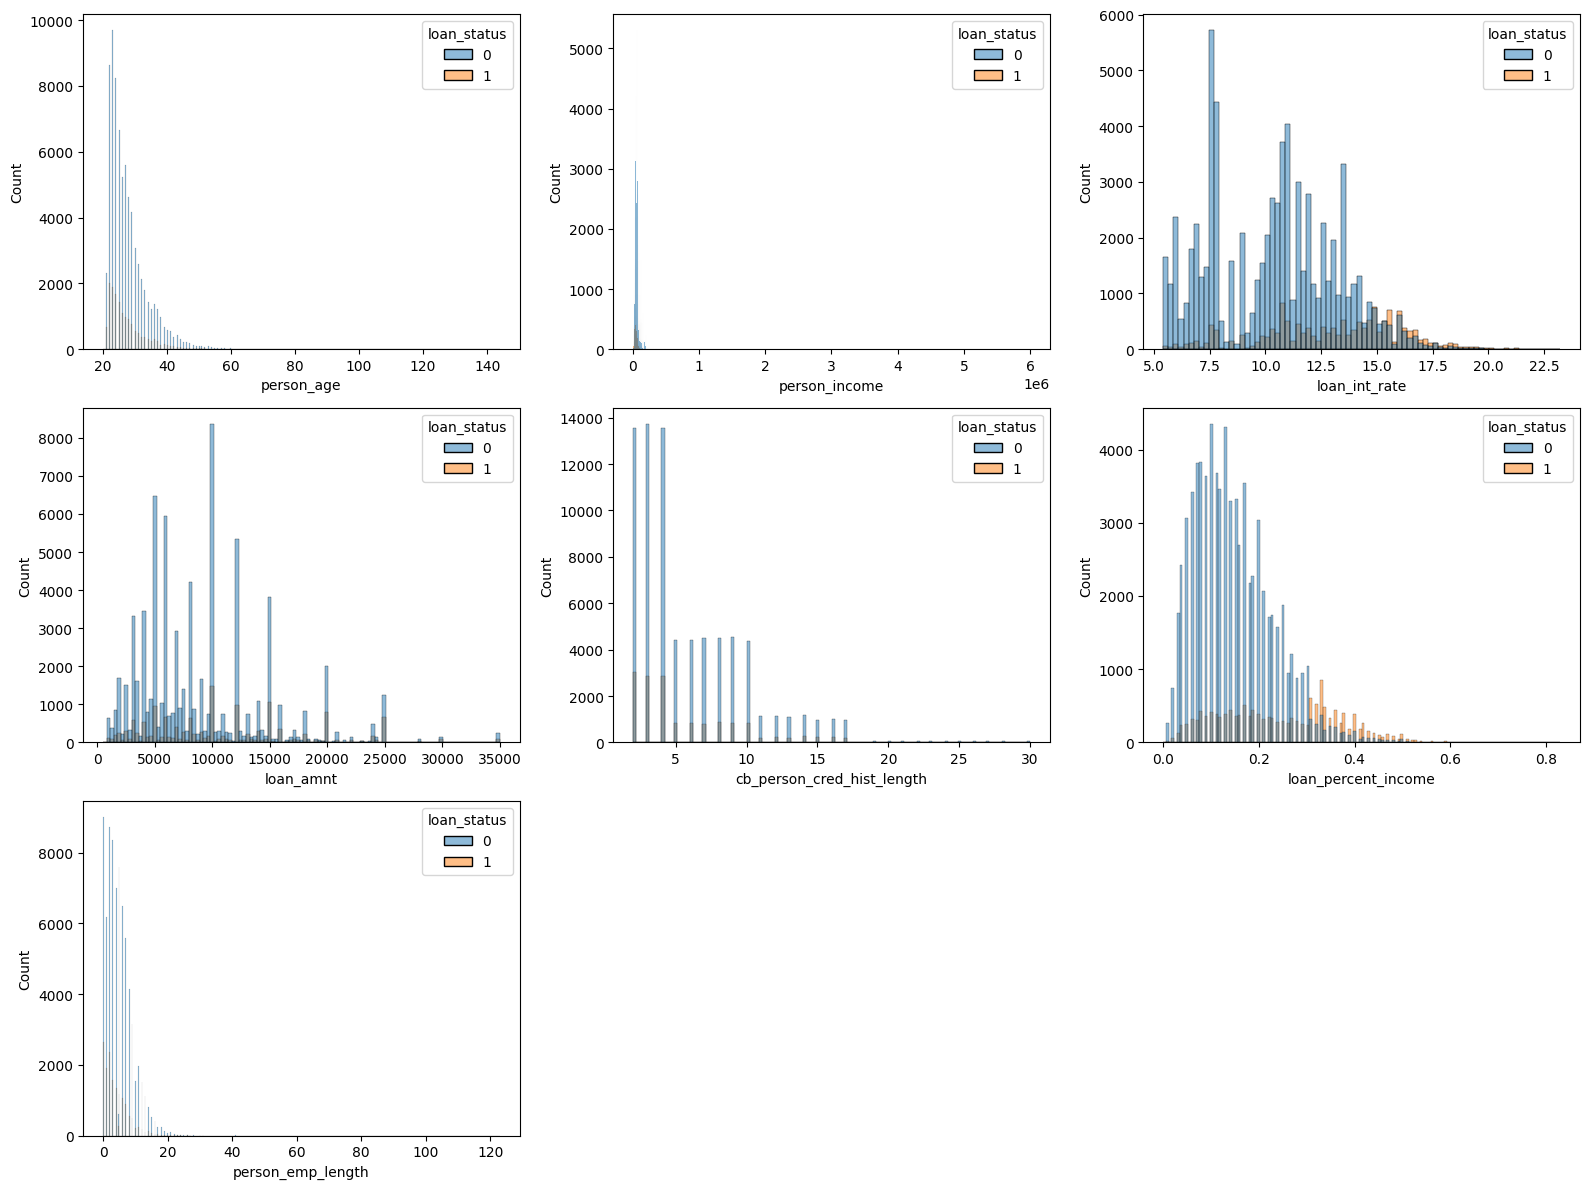

In [22]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(train_df, x=col, hue=target)

plt.tight_layout()
plt.show()

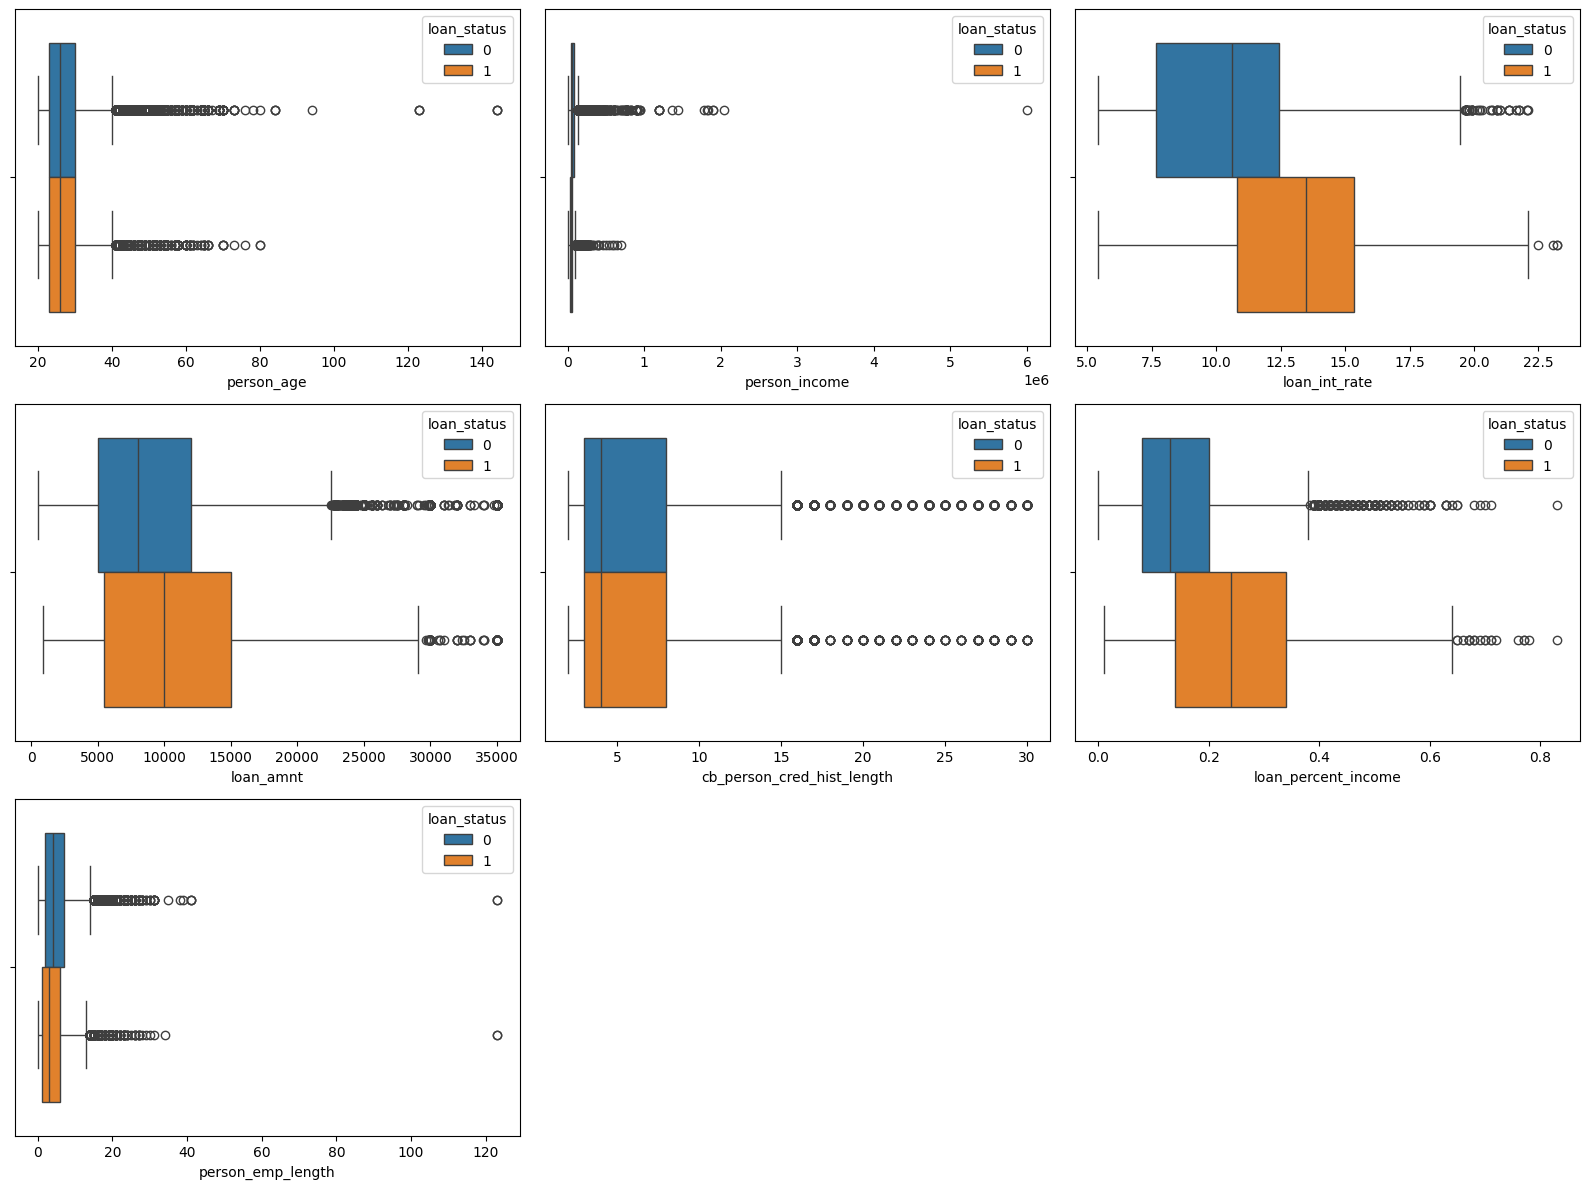

In [23]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(train_df, x=col, hue=target)

plt.tight_layout()
plt.show()

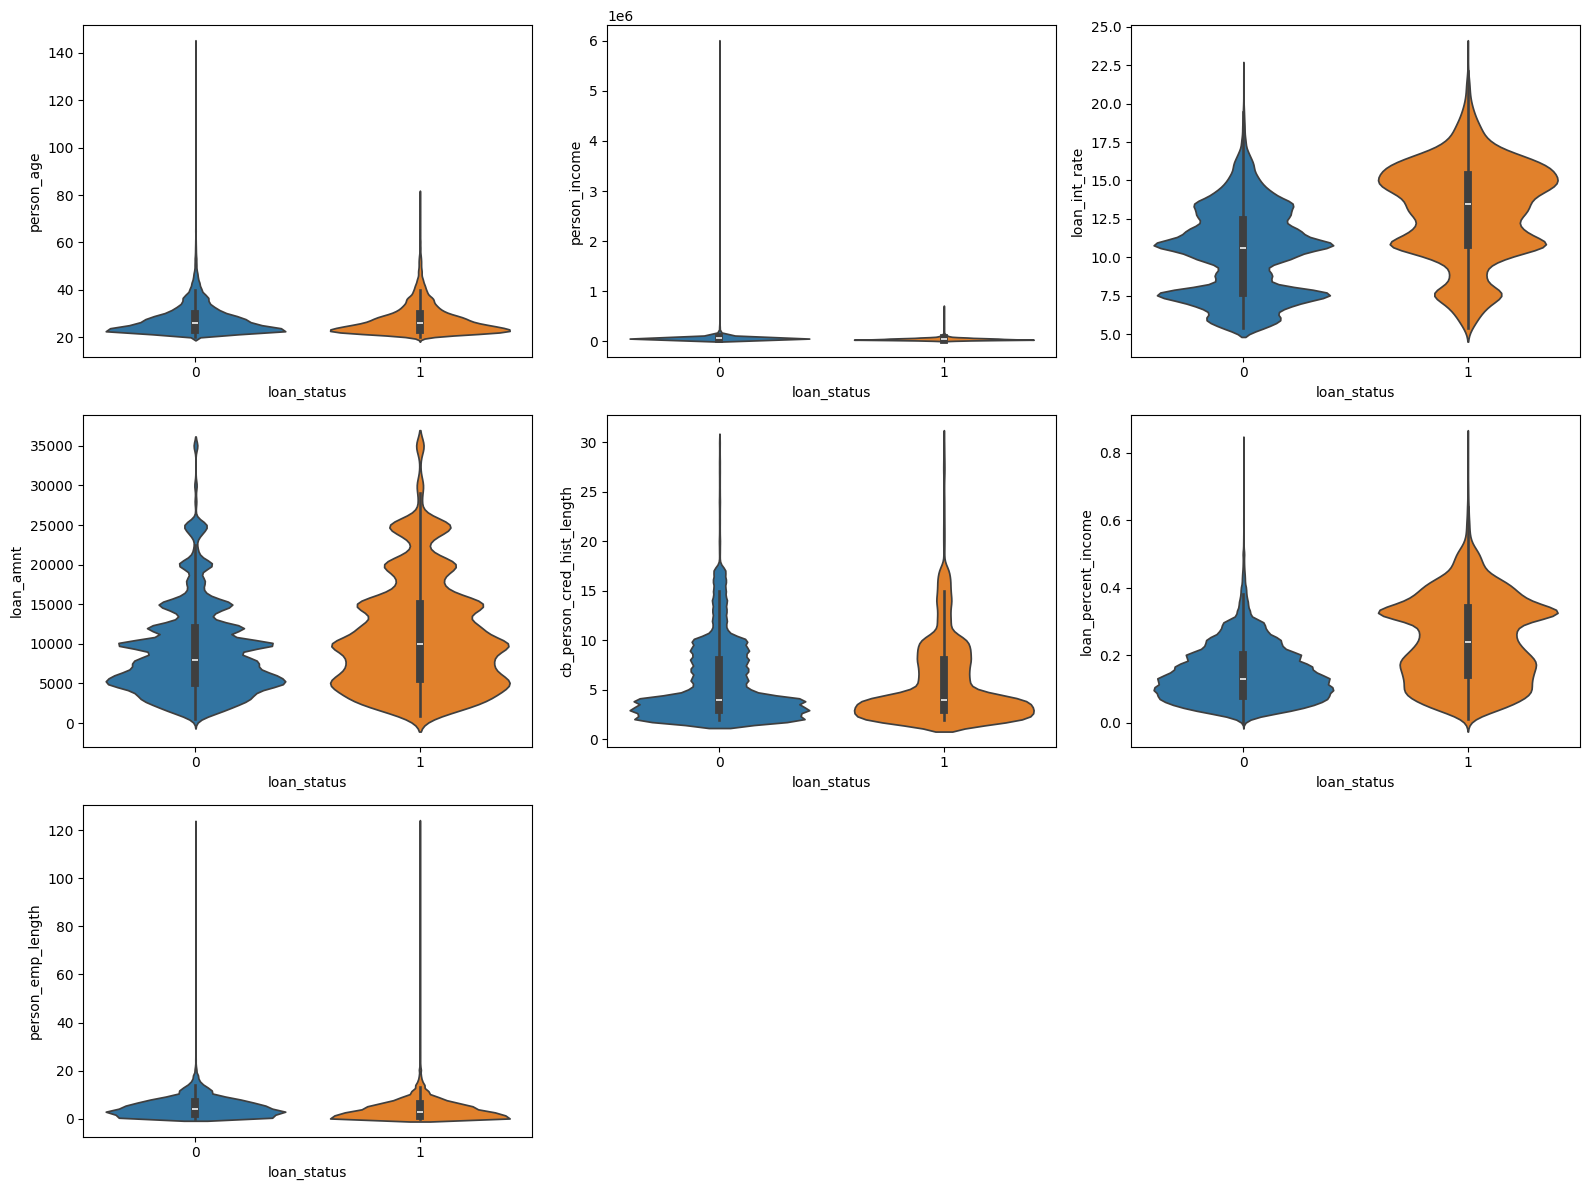

In [24]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.violinplot(train_df, x=target, y=col, hue=target, legend=None)

plt.tight_layout()
plt.show()

## Distribution of Categorical Features

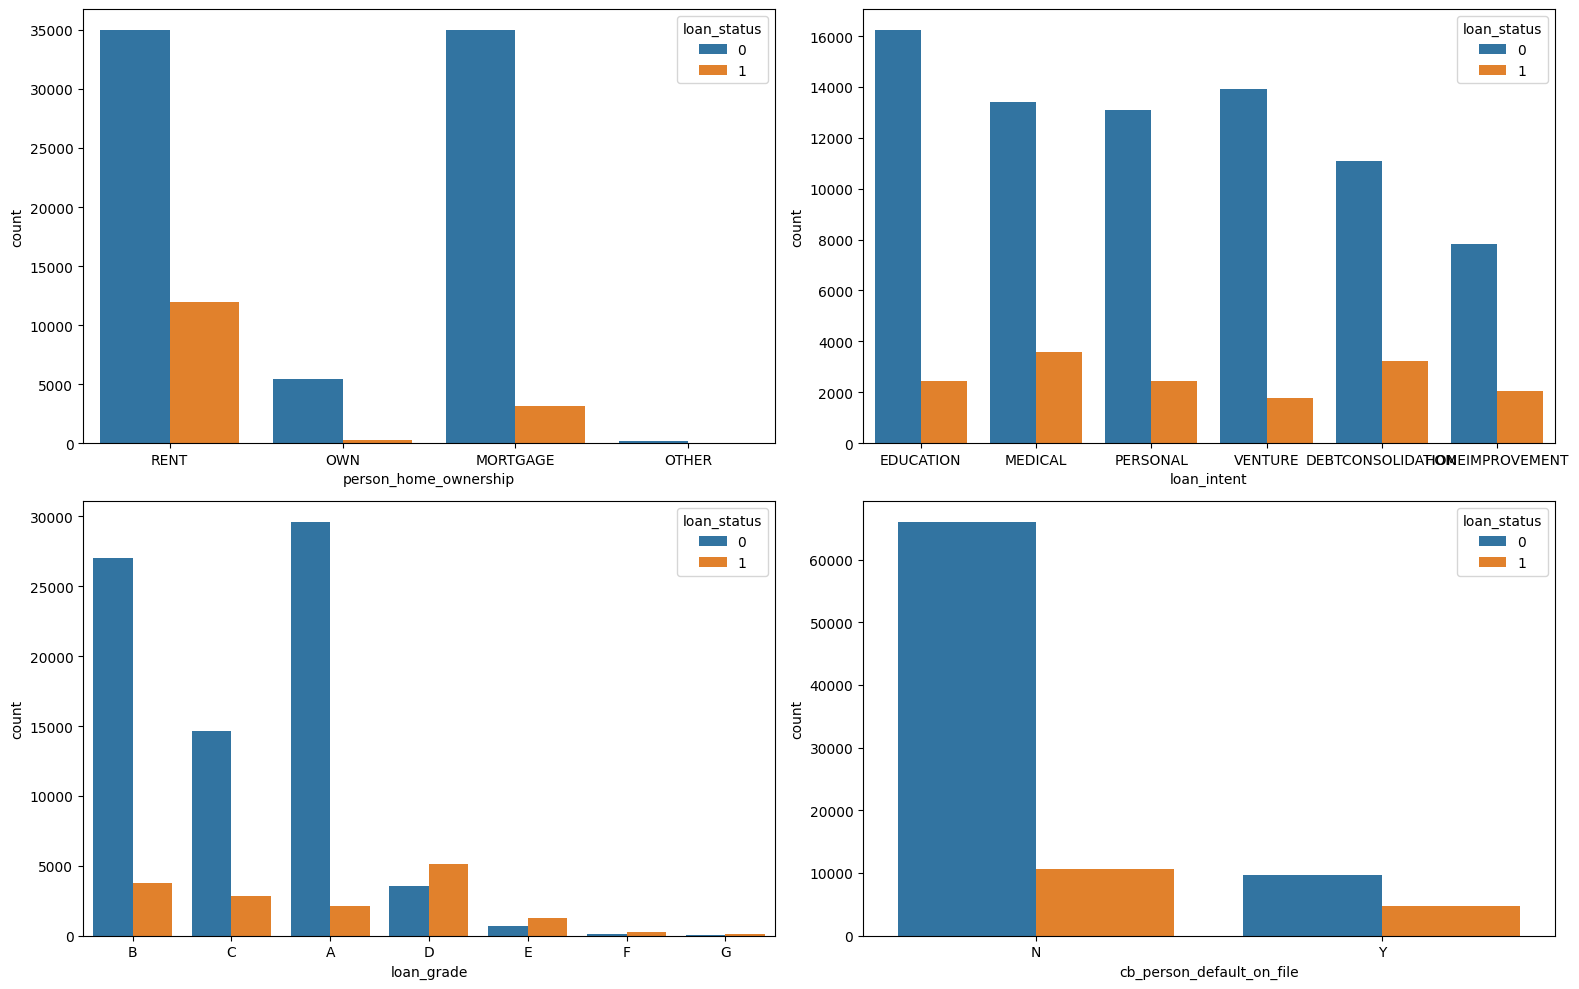

In [25]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(train_df, x=col, hue=target)

plt.tight_layout()
plt.show()

## Target Distribution

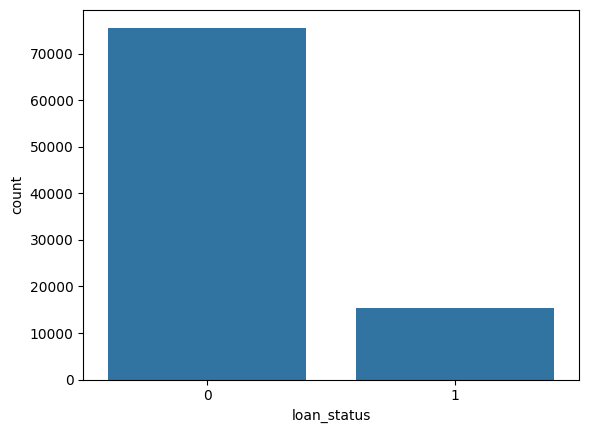

In [26]:
sns.countplot(train_df, x=target)
plt.show()

## Correlation Matrix

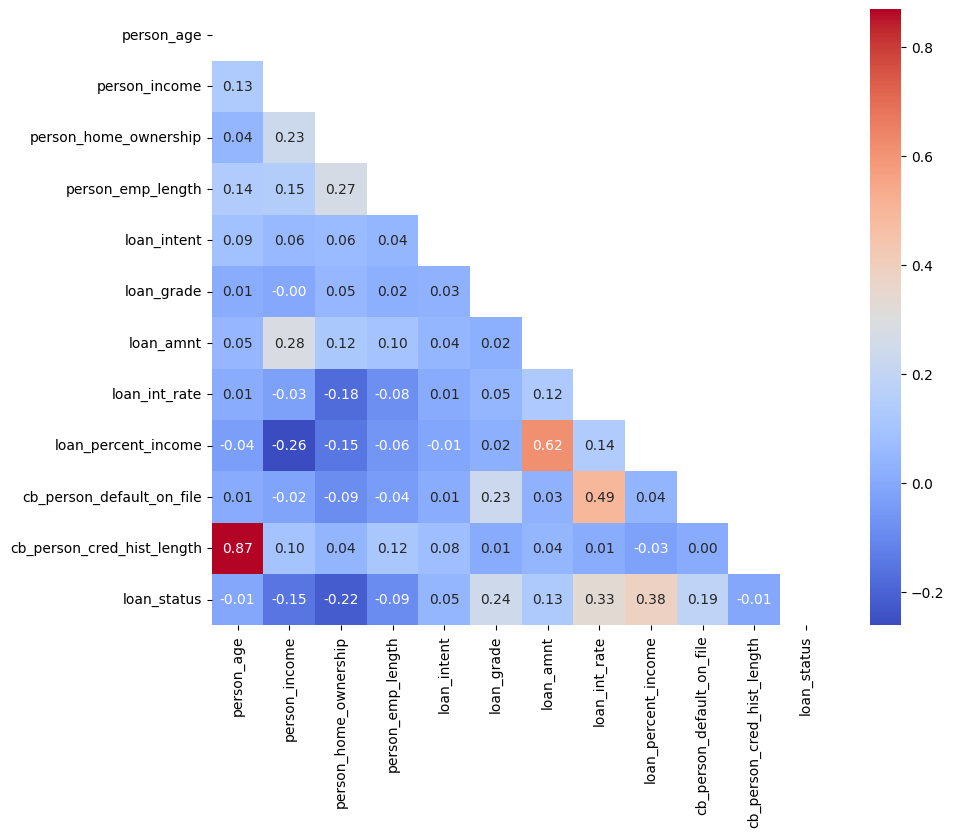

In [27]:
train_new = train_df.copy()

for col in categorical_features:
    train_new[col], _ = train_new[col].factorize()

cor_mat = train_new.corr()
mask = np.triu(cor_mat)

plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat, fmt='.2f', annot=True, mask=mask, cmap='coolwarm')
plt.show()

# Model Training And Prediction

In [28]:
def model_trainer(model, X, y, test, n_splits=10, random_state=42):
    skfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    roc_aucs = []
    test_pred = np.zeros(len(test))
    oof_train_preds = np.zeros(len(y))

    model_name = model[-1].__class__.__name__ if isinstance(model, Pipeline) else model.__class__.__name__
    
    print("="*72)
    print(f"Training {model_name}")
    print("="*72,sep='\n')
    
    for fold, (train_idx, test_idx) in enumerate(skfold.split(X, y)):
        X_train, y_train = X.iloc[train_idx, :], y[train_idx]
        X_test, y_test = X.iloc[test_idx, :], y[test_idx]

        model_clone = clone(model)
        model_clone.fit(X_train, y_train)
        try:
            y_pred_proba = model_clone.predict_proba(X_test)[:,1]
            test_pred += model_clone.predict_proba(test)[:, 1]
        except:
            y_pred_proba = model_clone.predict(X_test)
            test_pred += model_clone.predict(test)
        oof_train_preds[test_idx] = y_pred_proba
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        roc_aucs.append(roc_auc)
        print(f"Fold {fold+1} --> ROC_AUC Score: {roc_auc:.6f}")
        
        del model_clone, X_train, X_test, y_train, y_test
        gc.collect()

    print(f"\nAverage Fold ROC_AUC Score: {np.mean(roc_aucs):.6f} \xb1 {np.std(roc_aucs):.6f}\n")
    return test_pred/skfold.get_n_splits(), oof_train_preds

In [29]:
def convert_to_string(df):
    df_cat = df.copy()
    df_cat = df_cat.fillna(0)
    for col in features:
        df_cat[col] = df_cat[col].astype('string')
    return df_cat

In [30]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [31]:
X = train_df.drop(target, axis=1)
y = train_df[target].ravel()

In [32]:
train_preds = {}
test_preds = {}

In [33]:
X_xgb = X.copy()
X_xgb[categorical_features] = X_xgb[categorical_features].astype('category')

test_xgb = test_df.copy()
test_xgb[categorical_features] = test_xgb[categorical_features].astype('category')

oof_preds = []
oof_aucs = []
oof_train_preds = np.zeros(len(y))


xgb_params = {
    'eval_metric': 'auc',
    'n_estimators': 5000,
    'learning_rate': 0.10999995057648126,
    'max_depth': 8,
    'subsample': 0.9999999999999999,
    'colsample_bytree': 0.49681888251576845,
    'reg_alpha': 8.919028743833996e-06,
    'reg_lambda': 9.999999999999998,
    'gamma': 0.09787383664032377,
    'min_child_weight': 1.0,
    'max_bin': 262143,
#     'tree_method': 'hist',
#     'device': 'cuda',
    'enable_categorical': True,
    'early_stopping_rounds': 100,
}

for fold, (train_idx, test_idx) in enumerate(skfold.split(X_xgb, y)):
    X_train, y_train = X_xgb.iloc[train_idx], y[train_idx]
    X_test, y_test = X_xgb.iloc[test_idx], y[test_idx]
    
    xgb_clf = XGBClassifier(**xgb_params)
    xgb_clf = xgb_clf.fit(X_train, y_train,
                          eval_set=[(X_test, y_test)],
                          verbose=0)
    
    booster = xgb_clf.get_booster()
    oof_train_preds[test_idx] = booster.predict(DMatrix(X_test, enable_categorical=True),
                                               iteration_range=(0, xgb_clf.best_iteration + 1))
    test_pred = booster.predict(DMatrix(test_xgb, enable_categorical=True),
                                iteration_range=(0, xgb_clf.best_iteration + 1))
    auc = xgb_clf.best_score
    oof_aucs.append(auc)
    oof_preds.append(test_pred)
    print(f"Fold {fold+1} --> ROC-AUC Score: {auc:.6f}")
    
    del X_train, y_train, X_test, y_test, xgb_clf
    gc.collect()

auc_mean = np.mean(oof_aucs)
auc_std = np.std(oof_aucs)
print(f"\nAverage Fold ROC-AUC Score: {auc_mean:.6f} \xB1 {auc_std:.6f}\n")

train_preds['xgb'] = oof_train_preds
test_pred_xgb = np.mean(oof_preds, axis=0)
test_preds['xgb'] = test_pred_xgb

Fold 1 --> ROC-AUC Score: 0.960102
Fold 2 --> ROC-AUC Score: 0.960249
Fold 3 --> ROC-AUC Score: 0.964809
Fold 4 --> ROC-AUC Score: 0.957959
Fold 5 --> ROC-AUC Score: 0.960233
Fold 6 --> ROC-AUC Score: 0.961590
Fold 7 --> ROC-AUC Score: 0.964482
Fold 8 --> ROC-AUC Score: 0.967770
Fold 9 --> ROC-AUC Score: 0.963652
Fold 10 --> ROC-AUC Score: 0.961276

Average Fold ROC-AUC Score: 0.962212 ± 0.002765



In [34]:
oof_preds = []
oof_aucs = []
oof_train_preds = np.zeros(len(y))

cat_params={
    'task_type'           : "CPU",
    'loss_function'       : 'Logloss',
    'eval_metric'         : "AUC",
    'bagging_temperature' : 0.25,
    'colsample_bylevel'   : 0.40,
    'iterations'          : 5_000,
    'learning_rate'       : 0.045,
    'max_depth'           : 7,
    'l2_leaf_reg'         : 0.80,
    'min_data_in_leaf'    : 30,
    'random_strength'     : 0.25,
    'random_state'        : 42,
    'early_stopping_rounds': 200,
    'use_best_model'       : True,
    'allow_writing_files' : False,
} # parameters are taken from https://www.kaggle.com/code/martynovandrey/eda-and-lgb-cat-xgb

X_cat = convert_to_string(X)
test_cat = convert_to_string(test_df)

test_pool = Pool(test_cat, cat_features=features)

for fold, (train_idx, test_idx) in enumerate(skfold.split(X_cat, y)):
    X_train, y_train = X_cat.iloc[train_idx], y[train_idx]
    X_test, y_test = X_cat.iloc[test_idx], y[test_idx]
    
    X_train_pool = Pool(X_train, y_train, cat_features=features)
    X_test_pool = Pool(X_test, y_test, cat_features=features)
    
    cat_clf = CatBoostClassifier(**cat_params)
    cat_clf = cat_clf.fit(X=X_train_pool,
                          eval_set=X_test_pool,
                          verbose=0,
                          early_stopping_rounds=200)
    oof_train_preds[test_idx] = cat_clf.predict_proba(Pool(X_test, cat_features=features))[:, 1]
    test_pred = cat_clf.predict_proba(test_pool)[:, 1]
    
    oof_preds.append(test_pred)
    auc = cat_clf.best_score_['validation']['AUC']
    oof_aucs.append(auc)
    print(f"\nFold {fold+1}--> ROC-AUC Score: {auc:.6f}\n")
    
    del X_train, y_train, X_test, y_test
    del X_train_pool, X_test_pool
    del cat_clf
    gc.collect()

auc_mean = np.mean(oof_aucs)
auc_std = np.std(oof_aucs)
print(f"\nAverage Fold ROC-AUC Score: {auc_mean:.6f} \xB1 {auc_std:.6f}\n")

train_preds['cat'] = oof_train_preds
test_pred_cat = np.mean(oof_preds, axis=0)
test_preds['cat'] = test_pred_cat


Fold 1--> ROC-AUC Score: 0.965092


Fold 2--> ROC-AUC Score: 0.963950


Fold 3--> ROC-AUC Score: 0.970628


Fold 4--> ROC-AUC Score: 0.963949


Fold 5--> ROC-AUC Score: 0.967236


Fold 6--> ROC-AUC Score: 0.967638


Fold 7--> ROC-AUC Score: 0.970843


Fold 8--> ROC-AUC Score: 0.972891


Fold 9--> ROC-AUC Score: 0.968110


Fold 10--> ROC-AUC Score: 0.967751


Average Fold ROC-AUC Score: 0.967809 ± 0.002839



In [35]:
oof_preds = []
oof_aucs = []
oof_train_preds = np.zeros(len(y))

lgb_params = {
    'n_estimators': 3000,
    "verbosity": -1,
    'depth': 15,
    "eval_metric": "auc",
    "max_bin": 262143,
    'num_leaves': 223,
    'learning_rate': 0.01, 
    'min_child_samples': 54,
    'subsample': 0.5395472919165504,
    'colsample_bytree': 0.547518064129546,
    'lambda_l1': 3.4444245446562,
    'lambda_l2': 2.87490408088595e-05,
    'enable_categorical': True,
}

for fold, (train_idx, test_idx) in enumerate(skfold.split(X_xgb, y)):
    X_train, y_train = X_xgb.iloc[train_idx], y[train_idx]
    X_test, y_test = X_xgb.iloc[test_idx], y[test_idx]
    
    lgb_clf = LGBMClassifier(**lgb_params)
    lgb_clf = lgb_clf.fit(X_train, y_train,
                          eval_set=[(X_test, y_test)],
                          eval_metric='auc',
                          callbacks=[early_stopping(100)])
    y_pred = lgb_clf.predict_proba(X_test, num_iteration=lgb_clf.best_iteration_)[:,1]
    auc = roc_auc_score(y_test, y_pred)
    oof_aucs.append(auc)
    oof_train_preds[test_idx] = y_pred
    oof_preds.append(lgb_clf.predict_proba(test_xgb, num_iteration=lgb_clf.best_iteration_)[:,1])
    print(f"\nFold {fold+1}--> ROC-AUC Score: {auc:.6f}\n")
    
    del X_train, y_train, X_test, y_test, lgb_clf
    gc.collect()

auc_mean = np.mean(oof_aucs)
auc_std = np.std(oof_aucs)
print(f"\n\nAverage Fold ROC-AUC Score: {auc_mean:.6f} \xB1 {auc_std:.6f}\n\n")

train_preds['lgb'] = oof_train_preds
test_pred_lgb = np.mean(oof_preds, axis=0)
test_preds['lgb'] = test_pred_lgb

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1923]	valid_0's auc: 0.959324	valid_0's binary_logloss: 0.1593

Fold 1--> ROC-AUC Score: 0.959324

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1415]	valid_0's auc: 0.959223	valid_0's binary_logloss: 0.156768

Fold 2--> ROC-AUC Score: 0.959223

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1882]	valid_0's auc: 0.962799	valid_0's binary_logloss: 0.153441

Fold 3--> ROC-AUC Score: 0.962799

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1566]	valid_0's auc: 0.95784	valid_0's binary_logloss: 0.159558

Fold 4--> ROC-AUC Score: 0.957840

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1301]	valid_0's auc: 0.960511	valid_0's binary_logloss: 0.155012

Fold 5--> ROC-AUC Score: 0.960511

Training

In [36]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_oe = X.copy()
X_oe[categorical_features] = oe.fit_transform(X_oe[categorical_features])
test_oe = test_df.copy()
test_oe[categorical_features] = oe.transform(test_oe[categorical_features])

hgb_clf = HistGradientBoostingClassifier()
test_preds['hgb'], train_preds['hgb'] = model_trainer(hgb_clf, X_oe, y, test_oe, random_state=101)

Training HistGradientBoostingClassifier
Fold 1 --> ROC_AUC Score: 0.952781
Fold 2 --> ROC_AUC Score: 0.952946
Fold 3 --> ROC_AUC Score: 0.957209
Fold 4 --> ROC_AUC Score: 0.956234
Fold 5 --> ROC_AUC Score: 0.952355
Fold 6 --> ROC_AUC Score: 0.952024
Fold 7 --> ROC_AUC Score: 0.958741
Fold 8 --> ROC_AUC Score: 0.946785
Fold 9 --> ROC_AUC Score: 0.952135
Fold 10 --> ROC_AUC Score: 0.950626

Average Fold ROC_AUC Score: 0.953184 ± 0.003275



In [37]:
xgbrf_clf = XGBRFClassifier()

test_preds['rf'], train_preds['rf'] = model_trainer(xgbrf_clf, X_oe, y, test_oe, random_state=101)

Training XGBRFClassifier
Fold 1 --> ROC_AUC Score: 0.913512
Fold 2 --> ROC_AUC Score: 0.920426
Fold 3 --> ROC_AUC Score: 0.925219
Fold 4 --> ROC_AUC Score: 0.926166
Fold 5 --> ROC_AUC Score: 0.918226
Fold 6 --> ROC_AUC Score: 0.906763
Fold 7 --> ROC_AUC Score: 0.921727
Fold 8 --> ROC_AUC Score: 0.912412
Fold 9 --> ROC_AUC Score: 0.911648
Fold 10 --> ROC_AUC Score: 0.913321

Average Fold ROC_AUC Score: 0.916942 ± 0.006061



In [38]:
test_preds_df = pd.DataFrame(test_preds)
train_preds_df = pd.DataFrame(train_preds)

## Stacking

In [39]:
ridge = Ridge(positive=True, tol=1e-6)

ridge_pred_stack, _ = model_trainer(ridge, train_preds_df, y, test_preds_df,random_state=101)

Training Ridge
Fold 1 --> ROC_AUC Score: 0.966924
Fold 2 --> ROC_AUC Score: 0.968826
Fold 3 --> ROC_AUC Score: 0.970427
Fold 4 --> ROC_AUC Score: 0.969223
Fold 5 --> ROC_AUC Score: 0.970150
Fold 6 --> ROC_AUC Score: 0.969251
Fold 7 --> ROC_AUC Score: 0.973044
Fold 8 --> ROC_AUC Score: 0.962928
Fold 9 --> ROC_AUC Score: 0.967338
Fold 10 --> ROC_AUC Score: 0.969988

Average Fold ROC_AUC Score: 0.968810 ± 0.002538

